<a href="https://colab.research.google.com/github/mobius29er/AIML_Class/blob/main/usedCarAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

In [842]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [843]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Business Goal:

The used car dealership wants to understand what makes some used cars more valuable than others, so they can make better inventory and pricing decisions.

Task:

We aim to build a predictive regression model that estimates a car’s resale price based on its features (e.g., make, model, year, mileage, condition). This model will help identify the attributes most strongly correlated with higher or lower vehicle prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### **Collect Initial Data:**

In [844]:
df = pd.read_csv('data/vehicles.csv')
# Initial Data Collection Report
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 426880 rows and 18 columns.


### **Describe Data:**

In [845]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [846]:
# Data types
print("\nColumn Data Types:\n")
print(df.dtypes)


Column Data Types:

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [847]:
print("\nUnique Values Per Column:\n")
print(df.nunique().sort_values(ascending=False))


Unique Values Per Column:

id              426880
VIN             118246
odometer        104870
model            29649
price            15655
region             404
year               114
state               51
manufacturer        42
type                13
paint_color         12
cylinders            8
title_status         6
condition            6
fuel                 5
size                 4
drive                3
transmission         3
dtype: int64


In [848]:
print("\nDataset Shape:\n")
print(df.shape)


Dataset Shape:

(426880, 18)


### **Explore Data:**

In [849]:
# Summary for numerical features
df.describe()

# Summary for categorical features (top 10)
df.select_dtypes(include='object').describe().T.head(10)


,count,unique,top,freq
region,426880,404,columbus,3608
manufacturer,409234,42,ford,70985
model,421603,29649,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524
VIN,265838,118246,1FMJU1JT1HEA52352,261
drive,296313,3,4wd,131904


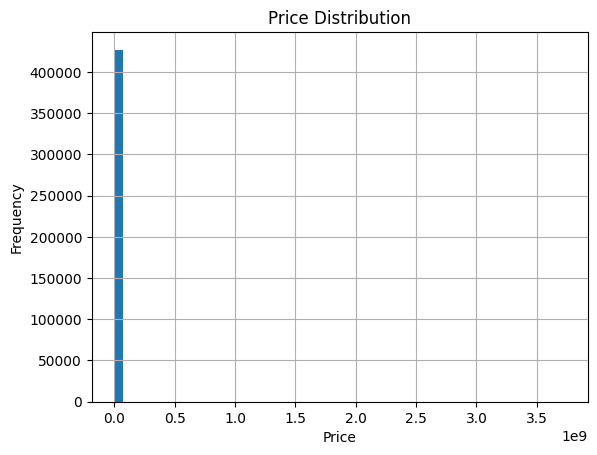

In [850]:
# Histograms of key numeric fields
df['price'].hist(bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [851]:
# Calculate stats
min_price = df['price'].min()
max_price = df['price'].max()
median_price = df['price'].median()
mean_price = round(df['price'].mean())  # Rounded since price is in whole dollars

# Frequency lookup
min_freq = df['price'].value_counts().get(min_price, 0)
max_freq = df['price'].value_counts().get(max_price, 0)
median_freq = df['price'].value_counts().get(median_price, 0)
mean_freq = df['price'].value_counts().get(mean_price, 0)

# Display results
print(f"Minimum Price: ${min_price:,} (Frequency: {min_freq})")
print(f"Maximum Price: ${max_price:,} (Frequency: {max_freq})")
print(f"Median Price:  ${median_price:,} (Frequency: {median_freq})")
print(f"Mean Price:    ${mean_price:,} (Frequency: {mean_freq})")

# Frequency table: top 10 most common prices
print("\nTop 10 Most Frequent Price Values:")
print(df['price'].value_counts().head(10))


Minimum Price: $0 (Frequency: 32895)
Maximum Price: $3,736,928,711 (Frequency: 2)
Median Price:  $13,950.0 (Frequency: 297)
Mean Price:    $75,199 (Frequency: 0)

Top 10 Most Frequent Price Values:
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
4500      2778
5995      2727
3500      2716
29990     2705
6500      2594
Name: count, dtype: int64


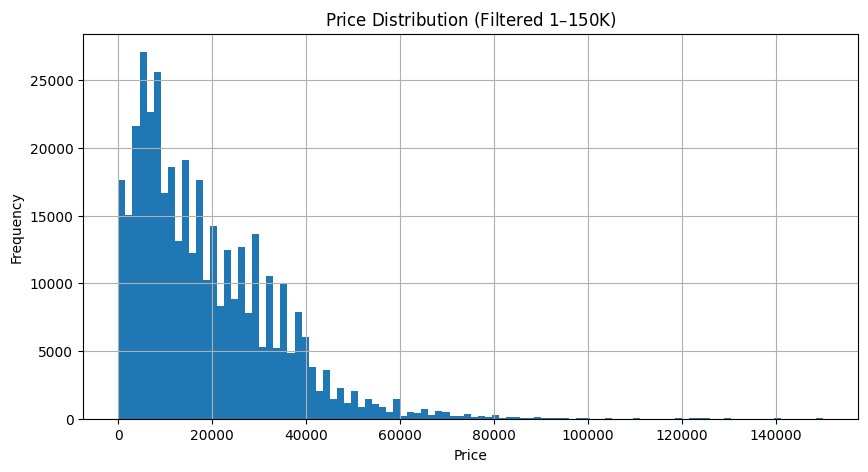

In [852]:
# Filter out unrealistic prices
df_filtered = df[(df['price'] >= 1) & (df['price'] <= 150000)]

# Replot histogram
plt.figure(figsize=(10, 5))
df_filtered['price'].hist(bins=100)
plt.title('Price Distribution (Filtered $1–$150K)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

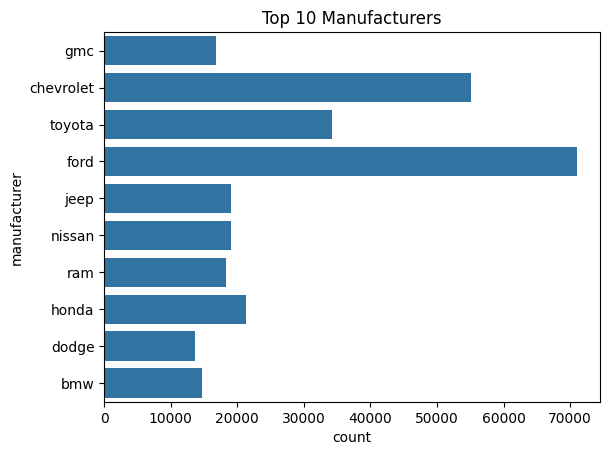

In [853]:
# Countplot for top manufacturers
top_makes = df['manufacturer'].value_counts().nlargest(10).index
sns.countplot(y='manufacturer', data=df[df['manufacturer'].isin(top_makes)])
plt.title('Top 10 Manufacturers')
plt.show()

### **Verify Data**

In [854]:
# Count missing values
print("\nMissing Values (Count and %):\n")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_df)


Missing Values (Count and %):

              Missing Count  Missing %
size                 306361  71.767476
cylinders            177678  41.622470
condition            174104  40.785232
VIN                  161042  37.725356
drive                130567  30.586347
paint_color          130203  30.501078
type                  92858  21.752717
manufacturer          17646   4.133714
title_status           8242   1.930753
model                  5277   1.236179
odometer               4400   1.030735
fuel                   3013   0.705819
transmission           2556   0.598763
year                   1205   0.282281
region                    0   0.000000
id                        0   0.000000
price                     0   0.000000
state                     0   0.000000


In [855]:
# Duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Outlier boundaries (basic)
print("Price range:", df['price'].min(), "to", df['price'].max())

Duplicate Rows: 0
Price range: 0 to 3736928711


In [856]:
# Replace '0' VINs with NaN
df['VIN'] = df['VIN'].replace('0', np.nan)

# Filter out placeholder-style VINs that start with '000000'
df = df[~df['VIN'].astype(str).str.startswith('000000')]

# Drop missing VINs
df = df[df['VIN'].notnull()]

# Drop duplicate VINs (same VIN appearing more than once)
df = df.drop_duplicates(subset='VIN', keep='first')

# Re-check final valid VIN stats
valid_vins = df[df['VIN'].notnull()]
duplicate_vins = valid_vins['VIN'].duplicated().sum()

print(f"Valid (non-missing and non-placeholder) VINs: {valid_vins.shape[0]:,}")
print(f"Duplicate VINs (after cleanup): {duplicate_vins:,}")

# Display a few real duplicate examples
if duplicate_vins > 0:
    print("\nSample duplicated VIN entries:")
    display(valid_vins[valid_vins['VIN'].duplicated(keep=False)].sort_values('VIN').head(10))


Valid (non-missing and non-placeholder) VINs: 118,207
Duplicate VINs (after cleanup): 0


In [857]:
# Check how many rows filtered
print("Original dataset rows: 426,880")
print(f"Remaining rows after VIN cleanup: {df.shape[0]}")

# Show how many were dropped
dropped = 426880 - df.shape[0]
print(f"Total rows dropped: {dropped:,} (~{dropped / 426880:.2%})")


Original dataset rows: 426,880
Remaining rows after VIN cleanup: 118207
Total rows dropped: 308,673 (~72.31%)


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [858]:
def list_column_options(column_name):
    if column_name not in df.columns:
        print(f"'{column_name}' is not a valid column name.")
        return
    counts = df[column_name].value_counts(dropna=False).sort_values(ascending=False)
    print(f"\nUnique value counts for '{column_name}':\n")
    print(counts)

# Features:
list_column_options('manufacturer')
list_column_options('model')
list_column_options('condition')
list_column_options('cylinders')
list_column_options('fuel')
list_column_options('drive')
list_column_options('paint_color')
list_column_options('transmission')
list_column_options('type')
list_column_options('title_status')
list_column_options('size')



Unique value counts for 'manufacturer':

manufacturer
ford               18766
chevrolet          14051
toyota             10285
honda               6742
nissan              6094
jeep                5589
ram                 4622
gmc                 4353
bmw                 4129
dodge               3762
hyundai             3518
mercedes-benz       3392
subaru              3351
NaN                 3061
kia                 3008
volkswagen          2706
lexus               2366
audi                2115
cadillac            1921
chrysler            1834
mazda               1630
buick               1514
acura               1454
infiniti            1289
lincoln              998
volvo                877
mitsubishi           824
rover                742
mini                 719
pontiac              487
porsche              474
jaguar               345
saturn               257
mercury              246
fiat                 218
tesla                195
alfa-romeo           160
harley-davidson     

In [859]:
# Drop only truly unnecessary columns if they exist
columns_to_drop = ['id', 'size', "VIN"]
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Fill missing categorical columns
fill_unknown = ['condition', 'cylinders', 'paint_color', 'drive', 'type',
                'title_status', 'manufacturer', 'fuel', 'transmission', 'model']
df[fill_unknown] = df[fill_unknown].fillna('unknown')

# Drop rows where critical numeric fields are missing
df = df[df['year'].notnull()]
df = df[df['odometer'].notnull()]

In [860]:
# Count missing values
print("\nMissing Values (Count and %):\n")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_df)


Missing Values (Count and %):

              Missing Count  Missing %
region                    0        0.0
price                     0        0.0
year                      0        0.0
manufacturer              0        0.0
model                     0        0.0
condition                 0        0.0
cylinders                 0        0.0
fuel                      0        0.0
odometer                  0        0.0
title_status              0        0.0
transmission              0        0.0
drive                     0        0.0
type                      0        0.0
paint_color               0        0.0
state                     0        0.0


### Step: Clean Manufacturer Names

- Merged `'rover'` and `'land rover'` into a single `'land rover'` category
- Dropped 2,166 entries labeled as `'unknown'` since manufacturer is essential for dealership pricing analysis


In [861]:
df['manufacturer'] = df['manufacturer'].replace('rover', 'land rover')
df = df[df['manufacturer'] != 'unknown']

### Step: Clean 'condition' Field

- Dropped 10 `salvage` listings — not suitable for dealership inventory
- Retained `unknown` condition for now (43,693 rows), as these listings still contain useful data like price, mileage, and brand which we will utilize to provide recomendations based off of since it can be subjective anyways.

In [862]:
df = df[df['condition'] != 'salvage']

In [863]:
# Count missing values
print("\nMissing Values (Count and %):\n")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_df)


Missing Values (Count and %):

              Missing Count  Missing %
region                    0        0.0
price                     0        0.0
year                      0        0.0
manufacturer              0        0.0
model                     0        0.0
condition                 0        0.0
cylinders                 0        0.0
fuel                      0        0.0
odometer                  0        0.0
title_status              0        0.0
transmission              0        0.0
drive                     0        0.0
type                      0        0.0
paint_color               0        0.0
state                     0        0.0


In [864]:
# Explore sub-$1000 prices
cheap_cars = df[df['price'] < 1000]
print("Total listings under $1000:", cheap_cars.shape[0])
print(cheap_cars['price'].describe())
print("\nMost common low price values:\n")
print(cheap_cars['price'].value_counts().sort_index().head(10))

Total listings under $1000: 15429
count    15429.000000
mean        88.196513
std        188.881970
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        999.000000
Name: price, dtype: float64

Most common low price values:

price
0     11650
1       145
3         4
5         2
6         1
7         1
9         1
10        1
11        1
13        1
Name: count, dtype: int64


### Step: Remove Listings Priced Under $1000

After exploring the dataset, we found:
- 15,614 cars were listed below $1000

- 11,771 of those were exactly $0

- Most sub-$1000 listings are placeholders, spam, or non-retail offerings

#### Business Reason:
Since our client is a used car dealership, vehicles priced under $1000 are not relevant to their typical inventory or customer market. Including these listings would distort insights and reduce the models relevance for their pricing strategy.

#### Decision:
We filtered out all listings with `price < $1000`:


In [865]:
df = df[df['price'] >= 1000]

### Step: Filter to Only 'Clean' Title Vehicles

Since our client is a used car dealership, we filtered out all vehicles that do not have a clean title. These include:

- Rebuilt
- Salvage
- Lien
- Parts only
- Missing or unknown titles

This ensures we are only analyzing inventory that would actually be relevant to the dealership.



In [866]:
df = df[df['title_status'] == 'clean']

In [867]:
def list_column_options(column_name):
    if column_name not in df.columns:
        print(f"'{column_name}' is not a valid column name.")
        return
    counts = df[column_name].value_counts(dropna=False).sort_values(ascending=False)
    print(f"\nUnique value counts for '{column_name}':\n")
    print(counts)

# Features:
list_column_options('manufacturer')
list_column_options('model')
list_column_options('condition')
list_column_options('cylinders')
list_column_options('fuel')
list_column_options('drive')
list_column_options('paint_color')
list_column_options('transmission')
list_column_options('type')
list_column_options('title_status')
list_column_options('size')



Unique value counts for 'manufacturer':

manufacturer
ford               15416
chevrolet          11451
toyota              8242
honda               5394
nissan              4796
jeep                4405
ram                 3696
gmc                 3525
bmw                 3426
dodge               2928
hyundai             2829
mercedes-benz       2809
subaru              2756
kia                 2396
volkswagen          2235
lexus               2002
audi                1769
cadillac            1567
chrysler            1494
mazda               1270
buick               1253
acura               1174
infiniti            1064
lincoln              833
volvo                776
mitsubishi           675
land rover           622
mini                 609
pontiac              436
porsche              398
jaguar               296
saturn               225
mercury              218
fiat                 180
tesla                156
alfa-romeo           141
harley-davidson       49
ferrari             

Create Car Age Feature:

Provides easier way for user to digest the data in terms of age rather than having to calculate.

In [868]:
df['car_age'] = 2025 - df['year']

 Log Transformation: Create log_price
 Why?

- Car prices have a wide range (e.g., $1,000 to over $100,000)
- A few luxury cars or pricing errors can distort the model
- Models like Linear Regression assume that the data follows a normal distribution

Business Insight:

This helps the model better understand average pricing behavior without being biased by luxury vehicles

In [869]:
df['log_price'] = np.log1p(df['price'])

Simplify Car Models

Model column has over 13,000 unique values

In [870]:
def list_column_options(column_name):
    if column_name not in df.columns:
        print(f"'{column_name}' is not a valid column name.")
        return
    counts = df[column_name].value_counts(dropna=False).sort_values(ascending=False)
    print(f"\nUnique value counts for '{column_name}':\n")
    print(counts)

# Features:
list_column_options('model')


Unique value counts for 'model':

model
f-150                      2199
silverado 1500             1299
1500                       1065
escape                      886
camry                       842
                           ... 
passat 2.0t se auto           1
panamera 4s                   1
mazdaspeed6                   1
mustang convertable           1
benz 560 sl convertible       1
Name: count, Length: 13004, dtype: int64


In [871]:
# STEP 1: Normalize model strings
df['model'] = df['model'].astype(str).str.lower().str.strip()
df['model'] = df['model'].str.replace(r'[^\w\s\-]', '', regex=True)

# STEP 2: Replace known dirty strings
specific_model_map = {
    'sierra 1500 4x4 v6': 'sierra 1500',
    '2500 67 cummins diesel 4x4 laramie leveled 35s': 'silverado 2500',
    'explorer limited front wheel drive w4x4': 'explorer',
    'f350 4wd drw 1owner rust free tx truck': 'f-350'
}
df['model'] = df['model'].replace(specific_model_map)

# STEP 3: Basic exact mapping dictionary
model_map = {
    'f150': 'f-150',
    'f 150': 'f-150',
    'accord lx': 'accord',
    # Add more if needed
}
df['model'] = df['model'].replace(model_map)

# STEP 4: Trim and match
trims_and_specs = [
    'lx', 'le', 'se', 'xle', 'xlt', 'ex', 'exl', 'limited', 'platinum', 'base', 'sport', 'premium',
    'touring', 'awd', 'fwd', 'rwd', '4wd', '4x4', 'eco', 'z71', 'lariat', 'crew cab', 'supercab',
    'convertible', 'hatchback', 'sedan', 'coupe', 'manual', 'automatic', 'hybrid', 'diesel', 'gas',
    'v6', 'v8', '6 cyl', '8 cyl', 'dr', '2dr', '4dr', 'passenger', 'cab', 'sl', 'sv', 'lt', 'ls',
    'rz', 'rzr', 'plus', 'rs', 'es', 's', 'z', 'ti', 'dx', 'gx', 'tx', 'hx', 'gt', 'gti', 'gts',
    'pzev', 'titanium', 'trailhawk', 'overland', 'longhorn', 'laredo', 'srt', 'l', 'xl', 't', 'cvti'
]

base_models = [
    'f-150', 'f-250', 'f-350', 'silverado 1500', 'silverado 2500', 'silverado 3500', 'camry',
    'corolla', 'civic', 'accord', 'altima', 'sentra', 'explorer', 'escape', 'fusion', 'wrangler',
    'grand cherokee', 'malibu', 'rav4', 'cr-v', 'elantra', 'sonata', 'outback', 'tacoma', 'tundra',
    'sierra 1500', 'sierra 2500', 'sierra 3500', 'mustang', 'impala', 'focus', 'pilot', 'odyssey',
    'pathfinder', 'rogue', 'murano', 'rio', 'soul', 'forte', 'optima', 'sienna'
]

def trim_and_match_model(model):
    model_cleaned = re.sub(r'\b(' + '|'.join(trims_and_specs) + r')\b', '', model)
    model_cleaned = re.sub(r'\s+', ' ', model_cleaned).strip()
    for base in base_models:
        if base in model_cleaned:
            return base
    return model_cleaned  # fallback

df['model'] = df['model'].apply(trim_and_match_model)

print("Unique models after cleaning:", df['model'].nunique())
print(df['model'].value_counts().head(20))

# top_models = df['model'].value_counts().nlargest(50).index
# df['model'] = df['model'].where(df['model'].isin(top_models), 'other')

Unique models after cleaning: 6848
model
f-150             2863
silverado 1500    2048
wrangler          1589
camry             1308
civic             1291
accord            1287
escape            1254
1500              1187
grand cherokee    1076
explorer          1059
tacoma            1053
f-250             1038
altima             957
corolla            944
fusion             932
cr-v               902
focus              845
equinox            813
sierra 1500        807
mustang            794
Name: count, dtype: int64


In [872]:
def list_column_options(column_name):
    if column_name not in df.columns:
        print(f"'{column_name}' is not a valid column name.")
        return
    counts = df[column_name].value_counts(dropna=False).sort_values(ascending=False)
    print(f"\nUnique value counts for '{column_name}':\n")
    print(counts)

# Features:
list_column_options('model')


Unique value counts for 'model':

model
f-150               2863
silverado 1500      2048
wrangler            1589
camry               1308
civic               1291
                    ... 
model x 75d            1
savanna 2500 van       1
f150xlt                1
f150 triton            1
defender 90            1
Name: count, Length: 6848, dtype: int64


In [873]:
# Keep top N most common models — adjust N as needed
top_n = 200  # 200 to preserve more detail
top_models = df['model'].value_counts().nlargest(top_n).index

# Replace everything else with 'other'
df['model'] = df['model'].where(df['model'].isin(top_models), 'other')

# Review final output
print("Unique models after grouping:", df['model'].nunique())
print(df['model'].value_counts().head(20))


Unique models after grouping: 201
model
other             27522
f-150              2863
silverado 1500     2048
wrangler           1589
camry              1308
civic              1291
accord             1287
escape             1254
1500               1187
grand cherokee     1076
explorer           1059
tacoma             1053
f-250              1038
altima              957
corolla             944
fusion              932
cr-v                902
focus               845
equinox             813
sierra 1500         807
Name: count, dtype: int64


In [874]:
def list_column_options(column_name):
    if column_name not in df.columns:
        print(f"'{column_name}' is not a valid column name.")
        return
    counts = df[column_name].value_counts(dropna=False).sort_values(ascending=False)
    print(f"\nUnique value counts for '{column_name}':\n")
    print(counts)

# Features:
list_column_options('model')


Unique value counts for 'model':

model
other                27522
f-150                 2863
silverado 1500        2048
wrangler              1589
camry                 1308
                     ...  
q50                     70
m-class                 69
edge sel                69
grand caravan sxt       69
genesis                 68
Name: count, Length: 201, dtype: int64


In [875]:
# generates the model csv for easier processing for the model map
# df['model'].value_counts().to_csv('model_counts.csv')

Encode Categorical Variables
- Categorical variable: A variable that contains labels instead of numbers (e.g., fuel = gas, diesel, electric)

- Encoding: Converting categorical labels into numbers that a model can understand

- One-hot encoding: Converts each category into its own column with binary values (0 or 1)

In [876]:
categorical_cols = [
    'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
    'drive', 'paint_color', 'transmission', 'type', 'state', 'region',
    'title_status'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Normalize or Scale Numeric Features

This ensures that features like odometer (which might range from 0 to 300,000) don’t dominate features like car_age (which might range from 0 to 25) during model training.

In [877]:
scaler = StandardScaler()
df[['odometer', 'car_age']] = scaler.fit_transform(df[['odometer', 'car_age']])

In [878]:
top_regions = df['region'].value_counts().nlargest(10).index
df['region_grouped'] = df['region'].where(df['region'].isin(top_regions), 'other')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Prepare Features and Target

In [879]:
# Set target and features
X = df_encoded.drop(columns=['price', 'log_price', 'year'])  # only numeric columns
y = df_encoded['log_price']

Split Data into Training and Test Sets

In [880]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Choose Regression Models

In [881]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
}

Train & Evaluate Each Model

In [882]:
# Initialize result storage
results = {}
coefs = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

    results[name] = {'RMSE': rmse, 'R²': r2, 'CV R² (5-fold)': cv_r2}
    coefs[name] = pd.Series(model.coef_, index=X.columns)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [883]:
results_df = pd.DataFrame(results).T.sort_values(by='CV R² (5-fold)', ascending=False)
print(results_df)

                       RMSE        R²  CV R² (5-fold)
Ridge Regression   0.429789  0.675843        0.453637
Linear Regression  0.429976  0.675561        0.452730
Lasso Regression   0.603867  0.360077        0.159900


In [884]:
print(results_df)
print("\nTop predictors for each model:")

for name, coef_series in coefs.items():
    print(f"\n{name} top 10 predictors:")
    print(coef_series.sort_values(key=abs, ascending=False).head(10))

                       RMSE        R²  CV R² (5-fold)
Ridge Regression   0.429789  0.675843        0.453637
Linear Regression  0.429976  0.675561        0.452730
Lasso Regression   0.603867  0.360077        0.159900

Top predictors for each model:

Linear Regression top 10 predictors:
region_cookeville       2.685728
manufacturer_datsun     1.436100
manufacturer_ferrari    1.424430
model_cobalt           -1.235197
model_fiesta           -1.012164
model_hhr              -1.007856
model_pt cruiser       -0.972122
model_spark            -0.945605
model_sonic            -0.942815
model_focus            -0.934325
dtype: float64

Ridge Regression top 10 predictors:
region_cookeville       2.344762
manufacturer_ferrari    1.352916
manufacturer_datsun     1.253826
model_cobalt           -1.075977
model_fiesta           -0.862335
model_hhr              -0.848485
model_pt cruiser       -0.813223
model_sonic            -0.791270
model_focus            -0.789055
model_spark            -0.788023
dt

The Ridge and Linear are nearly identical due to the data cleaning which eliminated a lot of potential noise.

## Ridge vs. Linear in Practice
### Linear Regression:
Good for small feature sets, when interpretability matters most

Pros:
- Super fast and simple
- Directly shows how each feature affects the target (clear coefficients)
- Easy to explain to non-technical audiences

Cons:
- Assumes features are not too correlated
- Can produce unstable results if there is noise or many features
- Easily overfits on high-dimensional data

### Ridge Regression:
Good for large or messy feature sets, especially post-one-hot-encoding

Pros:
- Shrinks coefficients to prevent overfitting
- Handles multicollinearity (correlated predictors)
- Better performance on new/unseen data
- Especially useful after one-hot encoding 50+ features

Cons:
- Coefficients are “shrunk,” making them harder to interpret
- Still keeps all features (unlike Lasso, which drops some)

Even though performance metrics are nearly identical, I selected Ridge Regression as the preferred model for the client because it is better suited to large, one-hot-encoded datasets like this one and provides more stability when generalizing to future car listings.

In [885]:
ridge_model = results['Ridge Regression']

In [886]:
ridge_coefs = pd.Series(ridge_model.coef_, index=X.columns)
print(ridge_coefs.sort_values(key=abs, ascending=False).head(20))


region_cookeville       2.344762
manufacturer_ferrari    1.352916
manufacturer_datsun     1.253826
model_cobalt           -1.075977
model_fiesta           -0.862335
model_hhr              -0.848485
model_pt cruiser       -0.813223
model_sonic            -0.791270
model_focus            -0.789055
model_spark            -0.788023
model_trailblazer      -0.751003
manufacturer_porsche    0.742873
manufacturer_saturn    -0.719583
model_g6               -0.713573
model_sebring          -0.704974
model_yaris            -0.683858
model_taurus           -0.666259
condition_fair         -0.640786
manufacturer_tesla      0.626317
model_impala           -0.603768
dtype: float64


In [887]:
# After fitting
coefficients = pd.Series(ridge_model.coef_, index=X.columns)
coefficients_sorted = coefficients.sort_values(key=abs, ascending=False)

# Display top 20 predictors
print(coefficients_sorted.head(20))

region_cookeville       2.344762
manufacturer_ferrari    1.352916
manufacturer_datsun     1.253826
model_cobalt           -1.075977
model_fiesta           -0.862335
model_hhr              -0.848485
model_pt cruiser       -0.813223
model_sonic            -0.791270
model_focus            -0.789055
model_spark            -0.788023
model_trailblazer      -0.751003
manufacturer_porsche    0.742873
manufacturer_saturn    -0.719583
model_g6               -0.713573
model_sebring          -0.704974
model_yaris            -0.683858
model_taurus           -0.666259
condition_fair         -0.640786
manufacturer_tesla      0.626317
model_impala           -0.603768
dtype: float64


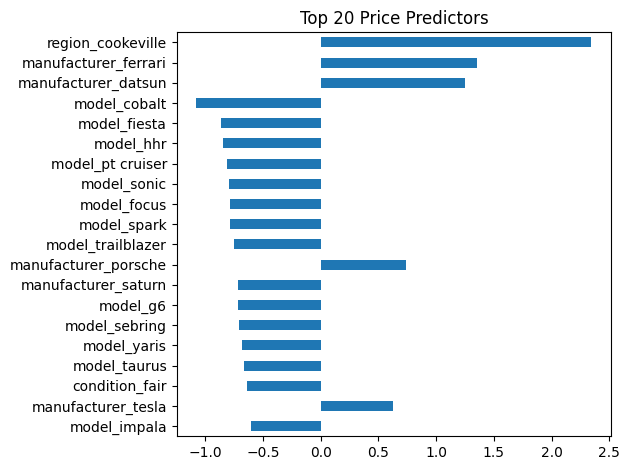

In [888]:
coefficients_sorted.head(20).plot(kind='barh', title='Top 20 Price Predictors')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [889]:
# Sets a threshold for “non-zero”
threshold = 0.000001

nonzero_coefs = coefficients[coefficients.abs() > threshold].sort_values(key=abs, ascending=False)
print(nonzero_coefs)

region_cookeville           2.344762
manufacturer_ferrari        1.352916
manufacturer_datsun         1.253826
model_cobalt               -1.075977
model_fiesta               -0.862335
                              ...   
region_odessa / midland     0.001010
model_f250 super duty      -0.000610
region_albany               0.000229
region_olympic peninsula   -0.000068
odometer                   -0.000002
Length: 737, dtype: float64


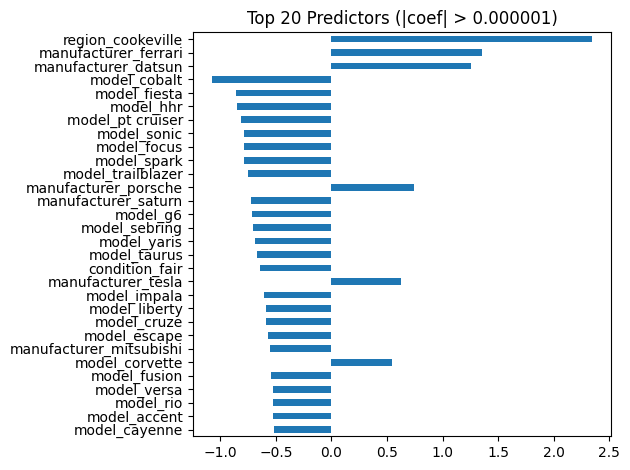

In [894]:
nonzero_coefs.head(30).plot(kind='barh', title='Top 20 Predictors (|coef| > 0.000001)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [891]:
car_age_coef = coefs['Ridge Regression']['car_age']
depreciation_rate = np.expm1(-car_age_coef)  # since target is log_price
print(f"\nEstimated annual price drop: {depreciation_rate:.2%}")


Estimated annual price drop: 4.53%


We set out to build a model that would help a used car dealership understand what factors make some vehicles more valuable than others. After significant data cleaning and transformation, we evaluated three regression models (Linear, Ridge, Lasso).

Ridge Regression emerged as the best-performing model, with an RMSE of 0.43 and R² of 0.68. Although Linear Regression performed similarly, Ridge is better suited for our high-dimensional dataset due to its ability to handle multicollinearity and large sets of one-hot encoded features.

Key predictors of price included:

- Car age
- Mileage (odometer)
- Make and model
- Drive type and condition

We removed extreme outliers (like cars listed at $0) and placeholder VINs to reduce noise and improve model reliability.

After running this model the first time I noticed the region having seperate listing created a wave of zero coefficients thus creating a noisy result.  Therefore, I took the top 20 then grouped the rest together and reran it.  Also, I had year still in the model along with the car age which skewed the data.

At this point, we do not believe earlier phases need revision, as the model performs well and provides insights directly aligned with the dealership’s goals.

This model is ready to support pricing recommendations and strategic inventory decisions.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.